In [1]:
# @formatter:off
%load_ext autoreload
%autoreload 2
# @formatter:on

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib.ticker as mtick
from matplotlib.colors import TwoSlopeNorm

In [4]:
df = pd.read_csv('results/results.csv')
# df = (df['cities'] > 280).sum()
df

,instance,tsp,cities,items,type,capacity,worse,median,best,std,...,seed4,fitness4,time4,start4,heuristic4,seed5,fitness5,time5,start5,heuristic5
0,eil51_n50_bounded-strongly-corr_01,eil51,51,1,bsc,1,4269.35619,4269.35619,4269.35619,0.00000,...,361,4269.35619,1.88340,174,1042,481,4269.35619,0.73817,179,1074
1,eil51_n50_bounded-strongly-corr_02,eil51,51,1,bsc,2,5571.16277,5571.16277,5571.16277,0.00000,...,362,5571.16277,4.50234,126,752,482,5571.16277,1.93947,143,853
2,eil51_n50_bounded-strongly-corr_03,eil51,51,1,bsc,3,5884.50818,5884.50818,5884.50818,0.00000,...,363,5884.50818,5.37830,137,821,483,5884.50818,56.82754,127,759
3,eil51_n50_bounded-strongly-corr_04,eil51,51,1,bsc,4,6396.85437,6396.85437,6396.85437,0.00000,...,364,6396.85437,35.82554,126,751,484,6396.85437,10.65235,131,785
4,eil51_n50_bounded-strongly-corr_05,eil51,51,1,bsc,5,5138.38852,5138.38852,5138.38852,0.00000,...,365,5138.38852,8.59762,111,664,485,5138.38852,0.65766,95,567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,pla85900_n858990_uncorr_06,pla85900,85900,10,unc,6,82077426.90638,91353826.33337,97143125.88730,5884499.20966,...,476,92858866.04774,712.13679,1,0,596,86160074.36161,607.79646,1,0
9716,pla85900_n858990_uncorr_07,pla85900,85900,10,unc,7,101263392.72509,104683184.72185,107566632.69499,2343060.55985,...,477,104683184.72185,609.57166,1,0,597,107566632.69499,621.93174,1,0
9717,pla85900_n858990_uncorr_08,pla85900,85900,10,unc,8,95907505.36557,99190179.91142,113241228.94628,8342108.73395,...,478,98815233.39614,739.50787,1,0,598,95907505.36557,637.98051,1,0
9718,pla85900_n858990_uncorr_09,pla85900,85900,10,unc,9,119441535.71730,121873094.70487,122977892.59722,1764383.44188,...,479,119441535.71730,690.78648,1,0,599,121873094.70487,603.26662,1,0


In [5]:
bkr = pd.read_csv('bkr/bkrs.csv')
bkr = bkr.round(0)
# bkr = bkr[bkr['tsp'] == 'eil51']
# bkr = bkr[np.isfinite(bkr['CS2SA*'])]
bkr

,instance,tsp,cities,items,type,capacity,best,algo,S1,S2,...,WC17,HLS,CS2SA*,CS2SA-R,JNB,J2B,MEA2P,COCO,COCOP,COCOL
0,eil51_n50_bounded-strongly-corr_01,eil51,51,1,bsc,1,4269.00000,"M4,M3B,M4B,MEA2P",3840.00000,3837.00000,...,-inf,3841.00000,-inf,-inf,-inf,-inf,4269.00000,-inf,-inf,-inf
1,eil51_n50_bounded-strongly-corr_02,eil51,51,1,bsc,2,5571.00000,"M4B,MEA2P",5076.00000,5076.00000,...,-inf,-inf,-inf,-inf,-inf,-inf,5571.00000,-inf,-inf,-inf
2,eil51_n50_bounded-strongly-corr_03,eil51,51,1,bsc,3,5885.00000,"M4B,MEA2P",5101.00000,4214.00000,...,-inf,-inf,-inf,-inf,-inf,-inf,5885.00000,-inf,-inf,-inf
3,eil51_n50_bounded-strongly-corr_04,eil51,51,1,bsc,4,6397.00000,JC17,5531.00000,4115.00000,...,-inf,-inf,-inf,-inf,-inf,-inf,6386.00000,-inf,-inf,-inf
4,eil51_n50_bounded-strongly-corr_05,eil51,51,1,bsc,5,5138.00000,"NDSBRKGA,JC17,MEA2P",3925.00000,2266.00000,...,-inf,-inf,-inf,-inf,-inf,-inf,5138.00000,-inf,-inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,pla85900_n858990_uncorr-similar-weights_06,pla85900,85900,10,usw,6,76211200.00000,MATLS,74534847.00000,74609485.00000,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
9716,pla85900_n858990_uncorr-similar-weights_07,pla85900,85900,10,usw,7,84815500.00000,MATLS,80474011.00000,83967841.00000,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
9717,pla85900_n858990_uncorr-similar-weights_08,pla85900,85900,10,usw,8,105513000.00000,MATLS,91815324.00000,92852233.00000,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
9718,pla85900_n858990_uncorr-similar-weights_09,pla85900,85900,10,usw,9,118020000.00000,MATLS,100651276.00000,102193482.00000,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf


In [6]:
results = df.merge(bkr, on=['instance', 'tsp', 'cities', 'items', 'type', 'capacity'], suffixes=('_res', '_bkr'))
results = results.round(0)
results

,instance,tsp,cities,items,type,capacity,worse,median,best_res,std,...,WC17,HLS,CS2SA*,CS2SA-R,JNB,J2B,MEA2P,COCO,COCOP,COCOL
0,eil51_n50_bounded-strongly-corr_01,eil51,51,1,bsc,1,4269.00000,4269.00000,4269.00000,0.00000,...,-inf,3841.00000,-inf,-inf,-inf,-inf,4269.00000,-inf,-inf,-inf
1,eil51_n50_bounded-strongly-corr_02,eil51,51,1,bsc,2,5571.00000,5571.00000,5571.00000,0.00000,...,-inf,-inf,-inf,-inf,-inf,-inf,5571.00000,-inf,-inf,-inf
2,eil51_n50_bounded-strongly-corr_03,eil51,51,1,bsc,3,5885.00000,5885.00000,5885.00000,0.00000,...,-inf,-inf,-inf,-inf,-inf,-inf,5885.00000,-inf,-inf,-inf
3,eil51_n50_bounded-strongly-corr_04,eil51,51,1,bsc,4,6397.00000,6397.00000,6397.00000,0.00000,...,-inf,-inf,-inf,-inf,-inf,-inf,6386.00000,-inf,-inf,-inf
4,eil51_n50_bounded-strongly-corr_05,eil51,51,1,bsc,5,5138.00000,5138.00000,5138.00000,0.00000,...,-inf,-inf,-inf,-inf,-inf,-inf,5138.00000,-inf,-inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,pla85900_n858990_uncorr_06,pla85900,85900,10,unc,6,82077427.00000,91353826.00000,97143126.00000,5884499.00000,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
9716,pla85900_n858990_uncorr_07,pla85900,85900,10,unc,7,101263393.00000,104683185.00000,107566633.00000,2343061.00000,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
9717,pla85900_n858990_uncorr_08,pla85900,85900,10,unc,8,95907505.00000,99190180.00000,113241229.00000,8342109.00000,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
9718,pla85900_n858990_uncorr_09,pla85900,85900,10,unc,9,119441536.00000,121873095.00000,122977893.00000,1764383.00000,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf


In [7]:
results_gecco17 = results.copy()
# results_gecco17 = results_gecco17[results_gecco17['cities'] >= 442]
# results_gecco17 = results_gecco17[results_gecco17['JC17'] > results_gecco17['median']]
algo = 'S5'
results_gecco17['improve%'] = 100 * (results_gecco17['median'] - results_gecco17[algo]) / results_gecco17[algo].abs()
# results_gecco17 = results_gecco17[results_gecco17['improve%'] < -2]
results_gecco17 = results_gecco17[results_gecco17['improve%'] > 10]
results_gecco17 = results_gecco17[['instance', 'cities', 'median', algo, 'improve%']]
results_gecco17

,instance,cities,median,S5,improve%
0,eil51_n50_bounded-strongly-corr_01,51,4269.00000,3840.00000,11.17188
2,eil51_n50_bounded-strongly-corr_03,51,5885.00000,5104.00000,15.30172
3,eil51_n50_bounded-strongly-corr_04,51,6397.00000,5531.00000,15.65720
4,eil51_n50_bounded-strongly-corr_05,51,5138.00000,3925.00000,30.90446
5,eil51_n50_bounded-strongly-corr_06,51,7114.00000,5899.00000,20.59671
...,...,...,...,...,...
9279,d15112_n45333_bounded-strongly-corr_10,15112,12467299.00000,11269929.00000,10.62447
9307,d15112_n75555_bounded-strongly-corr_08,15112,19319653.00000,17351967.00000,11.33984
9309,d15112_n75555_bounded-strongly-corr_10,15112,20716428.00000,18480550.00000,12.09855
9347,d15112_n151110_uncorr-similar-weights_08,15112,20915808.00000,18693258.00000,11.88958


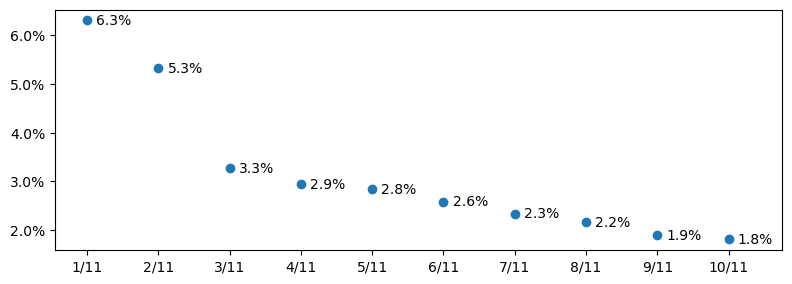

In [8]:
results_cap = results.copy()
algo = 'MY17'
results_cap['improve%'] = 100 * (results_cap['median'] - results_cap[algo]) / results_cap[algo].abs()
results_cap = results_cap[['instance', 'cities', 'capacity', 'median', algo, 'improve%']]
results_cap = results_cap.groupby(by='capacity')['improve%'].mean().reset_index()

results_cap_values = results_cap['improve%'].tolist()

fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(111)
fig.tight_layout()
ax.scatter(results_cap['capacity'], results_cap_values)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
ax.xaxis.set_ticks(range(1, 11))
ax.xaxis.set_ticklabels([f'{x}/11' for x in range(1, 11)])
plt.xlim(right=10.75)

for i, l in enumerate(results_cap_values):
    ax.annotate(f'{l:0.2}%', (0.13 + i + 1, -0.09 + results_cap_values[i]))

plt.savefig('/home/caios/figures/comp-my17-per-cap.pdf', bbox_inches = 'tight')

In [9]:
comp_metric = results.copy()
comp_metric = comp_metric[['tsp', 'cities', 'median', 'S5']]
# comp_metric = comp_metric[comp_metric['cities'] > 1173]
comp_metric['Melhor'] = comp_metric['median'] >= comp_metric['S5']
comp_metric['Igual'] = comp_metric['median'] == comp_metric['S5']
comp_metric['MouI'] = comp_metric['median'] >= comp_metric['S5']
# comp_metric = (comp_metric['median'] >= comp_metric['S5']).sum()
comp_metric = comp_metric.groupby(['tsp']).agg({'cities': 'min', 'Melhor': 'sum', 'Igual': 'sum', 'MouI': 'sum'}).reset_index()
# comp_metric['better%'] = 100 * comp_metric['better'] / comp_metric['tsp']
# comp_metric = comp_metric[comp_metric['cities'] > 1000]
# comp_metric = comp_metric[comp_metric['better%'] < 100]
comp_metric['Pior'] = 120 - comp_metric['MouI']

for c in ['Pior', 'Igual', 'Melhor', 'MouI']:
    comp_metric[f'{c}%'] = 100 * comp_metric[c] / 120

comp_metric = comp_metric.sort_values(by=['cities', 'tsp']).reset_index()

# comp_metric = comp_metric[comp_metric['Pior'] > 0]
comp_metric = comp_metric[['tsp', 'cities', 'Pior', 'Pior', 'Igual', 'Igual%', 'MouI', 'MouI%', 'Melhor', 'Melhor%']]
comp_metric

,tsp,cities,Pior,Pior,Igual,Igual%,MouI,MouI%,Melhor,Melhor%
0,eil51,51,0,0,1,0.83333,120,100.00000,120,100.00000
1,berlin52,52,0,0,0,0.00000,120,100.00000,120,100.00000
2,st70,70,0,0,0,0.00000,120,100.00000,120,100.00000
3,eil76,76,0,0,0,0.00000,120,100.00000,120,100.00000
4,pr76,76,0,0,1,0.83333,120,100.00000,120,100.00000
...,...,...,...,...,...,...,...,...,...,...
76,brd14051,14051,14,14,0,0.00000,106,88.33333,106,88.33333
77,d15112,15112,8,8,0,0.00000,112,93.33333,112,93.33333
78,d18512,18512,38,38,0,0.00000,82,68.33333,82,68.33333
79,pla33810,33810,20,20,0,0.00000,100,83.33333,100,83.33333


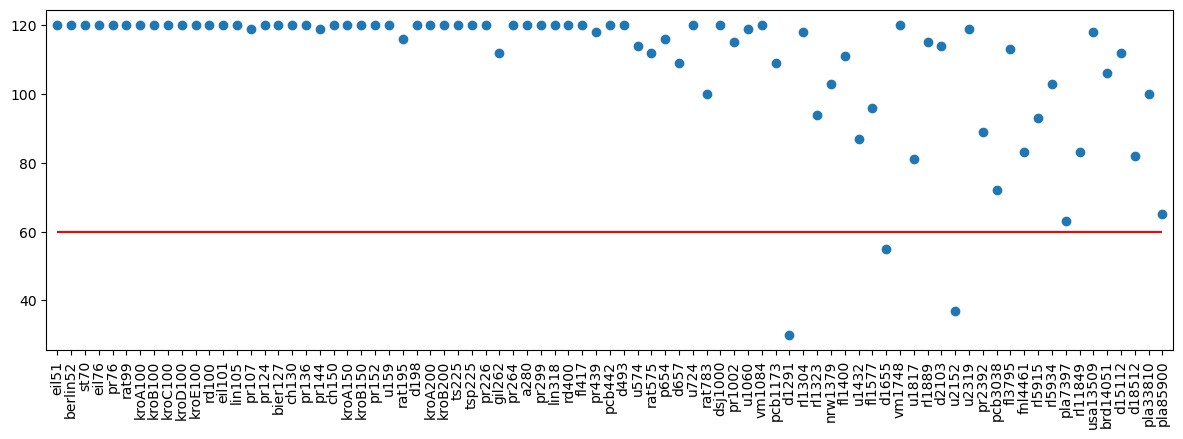

In [10]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)

fig.tight_layout()
# ax.set_xscale('log')
ax.scatter(range(len(comp_metric['Melhor'])), comp_metric['Melhor'])
ax.margins(0.01, 0.05)
# ax.hlines(50, comp_metric['cities'].min(), comp_metric['cities'].max(), color='red')
ax.hlines(60, 0, len(comp_metric['cities']) - 1, color='red')
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.xaxis.set_major_formatter(mtick.ScalarFormatter())

# ax.grid(True)

xticks = comp_metric['tsp'].drop_duplicates().tolist()
ax.set_xticks(range(0, len(xticks)), xticks, rotation=90)
plt.savefig('/home/caios/figures/comp-s5-per-tsp.pdf', bbox_inches = "tight")
plt.show()

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

In [11]:
results2 = results.copy()
results2 = results2[(np.isfinite(results2['CS2SA*'])) | (np.isfinite(results2['COCOP'])) | (np.isfinite(results2['COCOL']))]
results2 = results2[['instance', 'median', 'COCOP', 'COCOL']]
# results2['diff_WSM'] = (results2['median'] - results2['WSM']) / results2['WSM'].abs() * 100
# results2['diff_NDSBRKGA'] = (results2['median'] - results2['NDSBRKGA']) / results2['NDSBRKGA'].abs() * 100
# results2 = results2['tsp'].drop_duplicates()
results2['best'] = results2[['median', 'COCOP', 'COCOL']].max(axis=1)
results2['algo'] = results2[['median', 'COCOP', 'COCOL']].idxmax(axis=1)
results2

,instance,median,COCOP,COCOL,best,algo
360,eil76_n75_bounded-strongly-corr_01,4109.00000,4109.00000,4109.00000,4109.00000,median
508,eil76_n375_uncorr-similar-weights_05,23274.00000,22312.00000,22443.00000,23274.00000,median
598,eil76_n750_uncorr_10,88386.00000,87806.00000,87629.00000,88386.00000,median
720,kroA100_n99_bounded-strongly-corr_01,4976.00000,4783.00000,4746.00000,4976.00000,median
1164,kroA100_n495_uncorr-similar-weights_05,46632.00000,45812.00000,45812.00000,46632.00000,median
1434,kroA100_n990_uncorr_10,159135.00000,158777.00000,158279.00000,159135.00000,median
2040,ch130_n129_bounded-strongly-corr_01,9674.00000,9564.00000,9560.00000,9674.00000,median
2114,ch130_n645_uncorr-similar-weights_05,62496.00000,61703.00000,61698.00000,62496.00000,median
2159,ch130_n1290_uncorr_10,207166.00000,207159.00000,207159.00000,207166.00000,median
2880,u159_n158_bounded-strongly-corr_01,9080.00000,8763.00000,8792.00000,9080.00000,median


In [12]:
results2 = results.copy()
results2 = results2[(np.isfinite(results2['WSM'])) & (np.isfinite(results2['NDSBRKGA']))]
results2 = results2[['instance', 'median', 'WSM', 'NDSBRKGA']]
results2['diff_WSM'] = (results2['median'] - results2['WSM']) / results2['WSM'].abs() * 100
results2['diff_NDSBRKGA'] = (results2['median'] - results2['NDSBRKGA']) / results2['NDSBRKGA'].abs() * 100
# results2 = results2['tsp'].drop_duplicates()
results2

,instance,median,WSM,NDSBRKGA,diff_WSM,diff_NDSBRKGA
0,eil51_n50_bounded-strongly-corr_01,4269.00000,4207.00000,4060.00000,1.47373,5.14778
1,eil51_n50_bounded-strongly-corr_02,5571.00000,5116.00000,5464.00000,8.89367,1.95827
2,eil51_n50_bounded-strongly-corr_03,5885.00000,5104.00000,5729.00000,15.30172,2.72299
3,eil51_n50_bounded-strongly-corr_04,6397.00000,5531.00000,6081.00000,15.65720,5.19651
4,eil51_n50_bounded-strongly-corr_05,5138.00000,3925.00000,5138.00000,30.90446,0.00000
...,...,...,...,...,...,...
9715,pla85900_n858990_uncorr_06,91353826.00000,96571211.00000,81842879.00000,-5.40263,11.62098
9716,pla85900_n858990_uncorr_07,104683185.00000,104606401.00000,92245097.00000,0.07340,13.48374
9717,pla85900_n858990_uncorr_08,99190180.00000,113018266.00000,102635132.00000,-12.23527,-3.35650
9718,pla85900_n858990_uncorr_09,121873095.00000,120900315.00000,112878856.00000,0.80461,7.96805


In [13]:
import numpy as np

algos = results.columns.tolist()
algos = algos[algos.index('S1'):]
# algos = ['SH', 'RLS', 'EA', 'DH', 'MATLS', 'S1', 'S2', 'S3', 'S4', 'S5', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'M3', 'M4', 'M3B', 'M4B']

comparison = []

for algo in algos:
    has_data = np.isfinite(results[algo])
    worse = has_data & (results['median'] < results[algo])
    same = has_data & (results['median'] == results[algo])
    better = has_data & (results['median'] > results[algo])

    comparison.append((algo, has_data.sum(), worse.sum(), same.sum(), better.sum(), (same | better).sum()))

comparison = pd.DataFrame(comparison, columns=['algo', 'total', 'worse', 'same', 'better', 'as_good'])
comparison['same%'] = comparison['same'] / comparison['total'] * 100
comparison['worse%'] = comparison['worse'] / comparison['total'] * 100
comparison['better%'] = comparison['better'] / comparison['total'] * 100
comparison['as_good%'] = comparison['as_good'] / comparison['total'] * 100
# comparison = comparison[['algo', 'total', 'same', 'same%', 'better', 'better%', 'as_good', 'as_good%']]
comparison = comparison[['algo', 'total', 'worse', 'worse%', 'same', 'same%', 'as_good', 'as_good%', 'better', 'better%']]
comparison

,algo,total,worse,worse%,same,same%,as_good,as_good%,better,better%
0,S1,9720,71,0.73045,7,0.07202,9649,99.26955,9642,99.19753
1,S2,9720,89,0.91564,25,0.25720,9631,99.08436,9606,98.82716
2,S3,9720,72,0.74074,17,0.17490,9648,99.25926,9631,99.08436
3,S4,9720,63,0.64815,22,0.22634,9657,99.35185,9635,99.12551
4,S5,9720,880,9.05350,36,0.37037,8840,90.94650,8804,90.57613
5,C1,9720,100,1.02881,22,0.22634,9620,98.97119,9598,98.74486
6,C2,9720,105,1.08025,30,0.30864,9615,98.91975,9585,98.61111
7,C3,9720,412,4.23868,82,0.84362,9308,95.76132,9226,94.91770
8,C4,9720,488,5.02058,89,0.91564,9232,94.97942,9143,94.06379
9,C5,9720,90,0.92593,117,1.20370,9630,99.07407,9513,97.87037


In [15]:
# S5, MATLS, JNB e J2B, CS2SA* e CS2SA-R
# WSM, NDSBRKGA, MEA2P, COCO
# JC17, MY17

def calc_algo_df(algo, hide_non_present=True):
    algo_df = results
    
    if hide_non_present:
        algo_df = algo_df[np.isfinite(algo_df[algo])]
    algo_df = algo_df[['instance', 'tsp', 'cities', 'items', 'type', 'capacity', 'best_bkr', 'algo', 'median', algo]]
    algo_df = algo_df.rename(columns={'algo': 'best_algo'})
    algo_df = algo_df.rename(columns={algo: 'algo', 'best_bkr': 'best'})
    algo_df['diff'] = algo_df['median'] - algo_df['algo']
    algo_df['diff%'] = algo_df['diff'] / algo_df['algo'].abs() * 100
    # algo_df = algo_df.sort_values('diff%')
    # algo_df = algo_df[algo_df['items'] == 5]
    # algo_df = algo_df[algo_df['type'] == 'bsc']
    # algo_df = algo_df.sort_values('diff%')
    return algo_df

algo_df_jc = calc_algo_df('JC17')
algo_df_my = calc_algo_df('MY17')
algo_df_s5 = calc_algo_df('S5')
# algo_df = algo_df[~((algo_df['tsp'] == 'eil51') | (algo_df['tsp'] == 'berlin52') | (algo_df['tsp'] == 'pr76'))]
# algo_df = algo_df['diff%'].min(), algo_df['diff%'].max()
# algo_df = (algo_df['diff%'].max() > 10).sum()
algo_df = pd.DataFrame([])
algo_df['JC17'] = algo_df_jc['diff%']
algo_df['MY17'] = algo_df_my['diff%']
algo_df['S5'] = algo_df_s5['diff%']
algo_df['min'] = algo_df[['JC17', 'MY17', 'S5']].min(axis=1)
algo_df = (algo_df['min'] > 0).sum()
algo_df
# 24, 4646
# 283, 569
# round(24/9720*100, 2), round(4646/9720*100, 2)
# 

# 1429, 569, 4646
# 569/9720*100

6510

In [16]:
calc_algo_df('COCOP', True)

,instance,tsp,cities,items,type,capacity,best,best_algo,median,algo,diff,diff%
360,eil76_n75_bounded-strongly-corr_01,eil76,76,1,bsc,1,4109.00000,"M3,M4,M3B,M4B,COCO,COCOP,COCOL",4109.00000,4109.00000,0.00000,0.00000
508,eil76_n375_uncorr-similar-weights_05,eil76,76,5,usw,5,23175.00000,JC17,23274.00000,22312.00000,962.00000,4.31158
598,eil76_n750_uncorr_10,eil76,76,10,unc,10,107858.00000,"JNB,J2B",88386.00000,87806.00000,580.00000,0.66055
720,kroA100_n99_bounded-strongly-corr_01,kroA100,100,1,bsc,1,4976.00000,MEA2P,4976.00000,4783.00000,193.00000,4.03512
1164,kroA100_n495_uncorr-similar-weights_05,kroA100,100,5,usw,5,46605.00000,JC17,46632.00000,45812.00000,820.00000,1.78992
1434,kroA100_n990_uncorr_10,kroA100,100,10,unc,10,158777.00000,COCOP,159135.00000,158777.00000,358.00000,0.22547
2040,ch130_n129_bounded-strongly-corr_01,ch130,130,1,bsc,1,9698.00000,JC17,9674.00000,9564.00000,110.00000,1.15015
2114,ch130_n645_uncorr-similar-weights_05,ch130,130,5,usw,5,61703.00000,COCOP,62496.00000,61703.00000,793.00000,1.28519
2159,ch130_n1290_uncorr_10,ch130,130,10,unc,10,207654.00000,M3,207166.00000,207159.00000,7.00000,0.00338
2880,u159_n158_bounded-strongly-corr_01,u159,159,1,bsc,1,9048.00000,JC17,9080.00000,8763.00000,317.00000,3.61748


In [9]:
algos = ['S1', 'S2', 'S3', 'S4', 'S5', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'MATLS', 'DH', 'M3', 'M4', 'M3B', 'M4B', 'RLS', 'EA', 'SH', 'JC17', 'JK17', 'MY17', 'WC17', 'CS2SA*', 'CS2SA-R', 'MEA2P', 'WSM']
comp_todos = results.copy()
comp_todos['best_comp'] = comp_todos[algos].max(axis=1)
comp_todos = comp_todos[['instance', 'tsp', 'cities', 'median', 'best_comp']]
comp_todos['improv'] = comp_todos['median'] >= comp_todos['best_comp']
comp_todos = comp_todos.groupby('cities')['improv'].sum()
# comp_todos['comp_diff'] = 100 * (comp_todos['median'] - comp_todos['best_comp']) / comp_todos['best_comp'].abs()
# comp_todos = (comp_todos['comp_diff'] > 0).sum()
# comp_todos = (comp_todos['median'] > comp_todos['best_comp']).sum()
# # comp_todos = (comp_todos['median'] > comp_todos['best_comp']).sum()
# comp_todos = comp_todos / 9720 * 100
# 6132, 7226
comp_todos

cities
51       103
52       106
70        94
76       207
99       105
        ... 
14051     60
15112     30
18512     13
33810     59
85900     28
Name: improv, Length: 71, dtype: int64

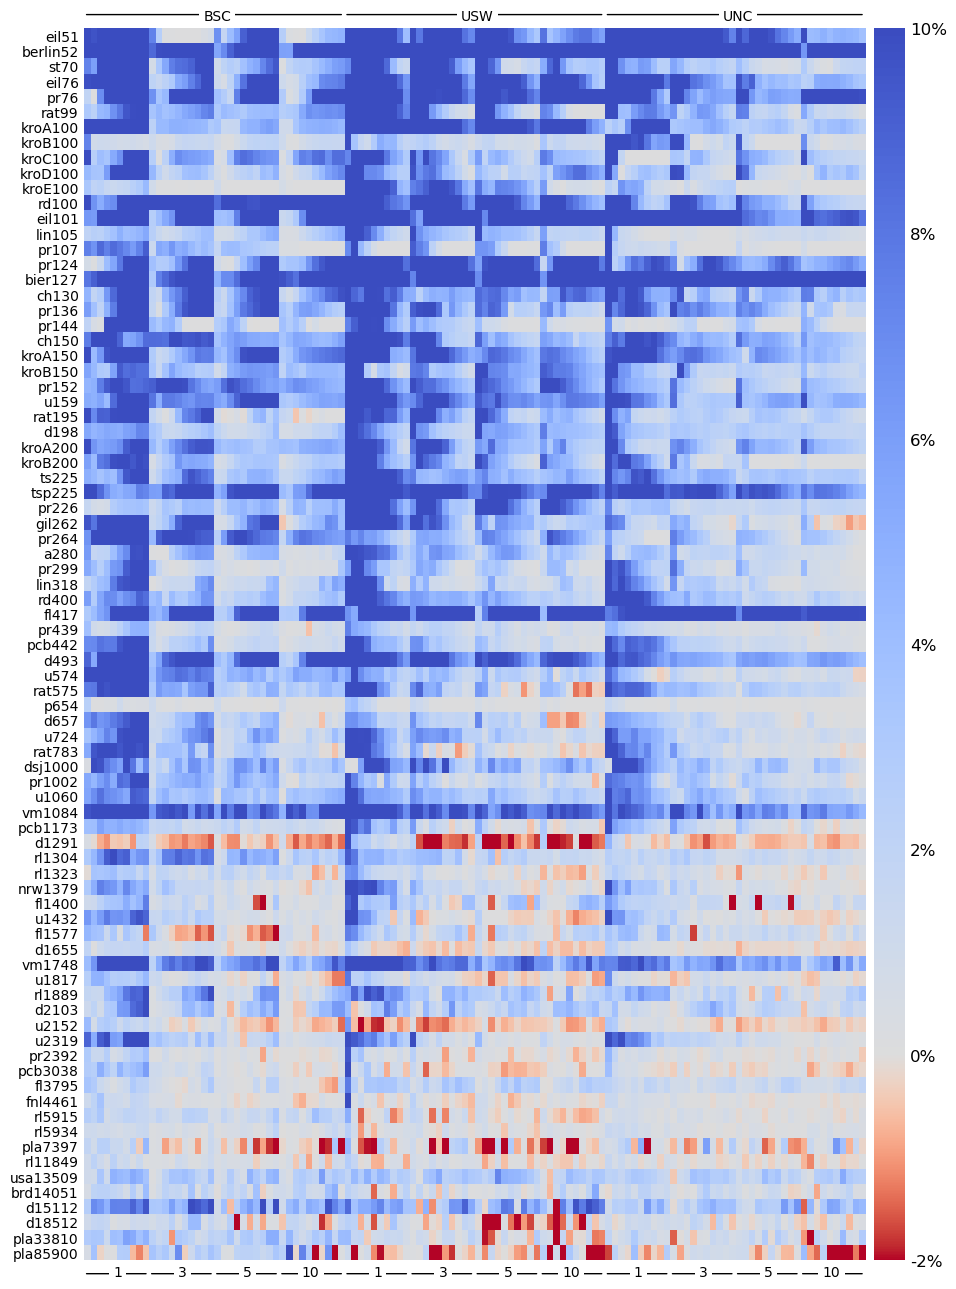

In [19]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import TwoSlopeNorm
from matplotlib.collections import LineCollection

algo_df0 = calc_algo_df('S5')
a = algo_df0
# a = a[a['type'] == 'unc']
a['type'] = a['type'].map({'bsc': 1, 'usw': 2, 'unc': 3})
a = a.sort_values(by=['cities', 'tsp', 'type', 'items', 'capacity'])

a = np.array(a['diff%'])
a = a.reshape((-1,120))
a_clipped = a
a_clipped = np.clip(a_clipped, -2, 10)

cmap = mpl.colormaps.get_cmap('coolwarm_r')
# cmap.set_bad(color='#273696')

# fig = plt.figure(figsize=(14, 16))
fig = plt.figure(figsize=(12, 16))

cmap.set_bad(color='#273696')
plt.imshow(a_clipped, cmap=cmap, interpolation='nearest', norm=TwoSlopeNorm(0), aspect='auto')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# plt.rc('ytick', labelsize=14)

# ax2 = plt.twinx()
# ax2.set_xticks(range(3), ['BSC', 'USW', 'UNC'])
# ax2.set_xticks(range(120), ['-'] * 120)

tsps = algo_df0['tsp'].drop_duplicates().tolist()
plt.yticks(range(len(tsps)), tsps)

# algos_df_eil51 = algo_df[algo_df['tsp'] == 'eil51']
# algos_df_eil51 = [f'n{i}_{t}_{c}' for (i, t, c) in (zip(algos_df_eil51['items'], algos_df_eil51['type'], algos_df_eil51['capacity']))]
# plt.xticks(range(3), ['1_bsc_01', '5_usw_05', '10_unc_10'], rotation=45, ha='right')
# ax.tick_params(axis='x', which='major', bottom=False, top=False)

ticks_pos = [4, 4, 4, 3] * 3
plt.xticks([ticks_pos[x] + 10 * x for x in range(12)], [1, 3, 5, 10] * 3, ha='left', bbox=dict(facecolor='white', edgecolor='none', pad=3))
# for label in ax.get_xticklabels():
#     label.set_horizontalalignment('center')
#     label.set_transform((label.get_transform() + matplotlib.transforms.ScaledTranslation(50/72, 0/72, fig.dpi_scale_trans)))
for i in range(12):
    ax.annotate("",
                xy=(i / 12, -0.011), xycoords='axes fraction',
                xytext=((i + 1) / 12, -0.011), textcoords='axes fraction',
                arrowprops=dict(arrowstyle="-", connectionstyle="arc3, rad=0"),
                zorder=-10000
                )

ax_t = ax.secondary_xaxis('top')
ax_t.set_ticks([20 + 40 * x for x in range(3)], ['BSC', 'USW', 'UNC'], bbox=dict(facecolor='white', edgecolor='none', pad=3))

ax_t.spines['top'].set_visible(False)
ax_t.spines['right'].set_visible(False)
ax_t.spines['bottom'].set_visible(False)
ax_t.spines['left'].set_visible(False)

for i in range(3):
    ax.annotate("",
                xy=(i / 3, 1 + 0.011), xycoords='axes fraction',
                xytext=((i + 1) / 3, 1 + 0.011), textcoords='axes fraction',
                arrowprops=dict(arrowstyle="-", connectionstyle="arc3, rad=0"),
                zorder=-10000
                )

ax.tick_params(axis='both', which='both', length=0)
ax_t.tick_params(axis='both', which='both', length=0)

cb = plt.colorbar(pad=0.01, aspect=40)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both', length=0, labelsize=12)
cb.ax.set_yscale('linear')
cb.set_ticks([-2, 0, 2, 4, 6, 8, 10])
cb.set_ticklabels(['-2%', '0%', '2%', '4%', '6%', '8%', '10%'])

# for (j,i),label in np.ndenumerate(a):
#     plt.text(i,j, round(label, 2), ha='center', va='center', path_effects=[pe.withStroke(linewidth=2, foreground='#dddddd')])

# ax.add_line(Line2D([0], [1000], lw=5, color='r'))
# plt.plot([50, 75], [100, 150], color='k', linestyle='-', linewidth=2)

# l1 = [(70, 100), (70, 250)]
# l2 = [(70, 90), (90, 200)]
# lc = LineCollection([l1, l2], color=["k","blue"], lw=2)
# plt.gca().add_collection(lc)

# plt.savefig('/home/caios/figures/comp-wsm.pdf', bbox_inches = "tight")
plt.show()

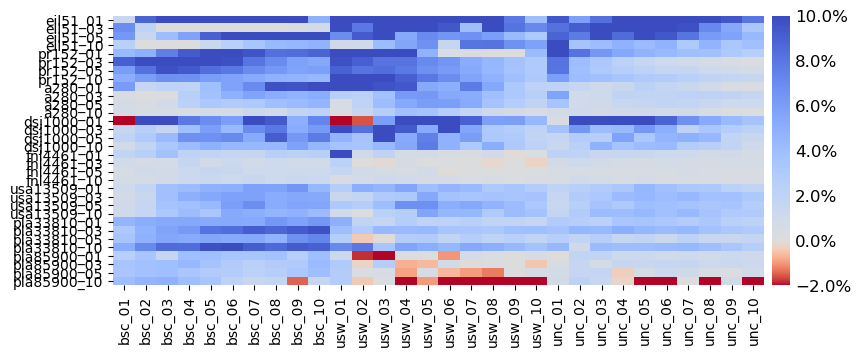

In [17]:
algo_df2 = algo_df.copy()
# algo_df2 = algo_df[((algo_df['tsp'] == 'eil51') | (algo_df['tsp'] == 'berlin52') | (algo_df['tsp'] == 'pr76'))]

a = algo_df2.copy()
a['type'] = a['type'].map({'bsc': 1, 'usw': 2, 'unc': 3})
a = a.sort_values(by=['cities', 'tsp', 'items', 'type', 'capacity'])

a = np.array(a['diff%'])
a = a.reshape((-1,120 // 4))
a_clipped = a
a_clipped = np.clip(a_clipped, -2, 10)

cmap = mpl.colormaps.get_cmap('coolwarm_r')
# cmap.set_bad(color='#273696')

fig = plt.figure(figsize=(10, 3.5))
plt.imshow(a_clipped, cmap=cmap, interpolation='nearest', norm=TwoSlopeNorm(0), aspect='auto')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

algo_df_tsp_items = algo_df2[['tsp', 'items']].drop_duplicates()
algo_df_tsp_items = [f'{t}_{i:02}' for (t, i) in zip(algo_df_tsp_items['tsp'], algo_df_tsp_items['items'])]
plt.yticks(range(len(algo_df_tsp_items)), algo_df_tsp_items)

algo_df_type_cap = algo_df2[['type', 'capacity']].drop_duplicates()
algo_df_type_cap = [f'{t}_{i:02}' for (t, i) in zip(algo_df_type_cap['type'], algo_df_type_cap['capacity'])]
plt.xticks(range(len(algo_df_type_cap)), algo_df_type_cap, rotation=90)

cb = plt.colorbar(pad=0.01, aspect=15)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both', length=0, labelsize=12)
cb.ax.set_yscale('linear')
cb.ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))

plt.savefig('/home/caios/figures/comp-mea2p-small.pdf', bbox_inches = "tight")
plt.show()

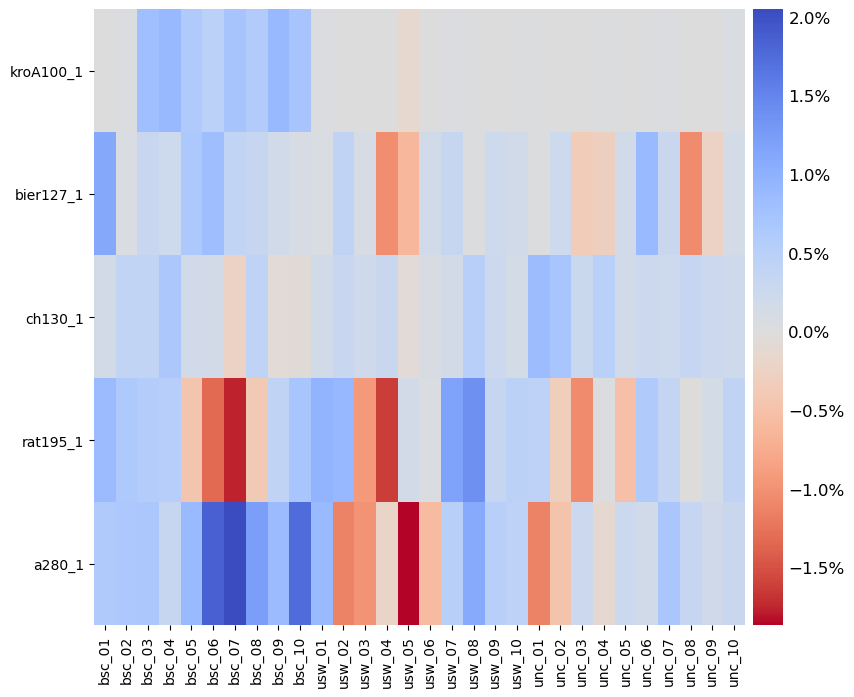

In [96]:
algo_df3 = algo_df
algo_df3 = algo_df3[~((algo_df['tsp'] == 'eil51') | (algo_df['tsp'] == 'berlin52') | (algo_df['tsp'] == 'pr76'))]

a = algo_df3.copy()
# a = a[a['type'] == 'unc']
a['type'] = a['type'].map({'bsc': 1, 'usw': 2, 'unc': 3})
a = a.sort_values(by=['cities', 'tsp', 'type', 'items', 'capacity'])

a = np.array(a['diff%'])
a = a.reshape((-1,120 // 4))
a_clipped = a
a_clipped = np.clip(a_clipped, -2, 10)

cmap = mpl.colormaps.get_cmap('coolwarm_r')
# cmap.set_bad(color='#273696')

# fig = plt.figure(figsize=(14, 16))
fig = plt.figure(figsize=(10, 8))
plt.imshow(a_clipped, cmap=cmap, interpolation='nearest', norm=TwoSlopeNorm(0), aspect='auto')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

algo_df_tsp_items = algo_df3[['tsp', 'items']].drop_duplicates()
algo_df_tsp_items = [f'{t}_{i}' for (t, i) in zip(algo_df_tsp_items['tsp'], algo_df_tsp_items['items'])]
plt.yticks(range(len(algo_df_tsp_items)), algo_df_tsp_items)

algo_df_type_cap = algo_df3[['type', 'capacity']].drop_duplicates()
algo_df_type_cap = [f'{t}_{i:02}' for (t, i) in zip(algo_df_type_cap['type'], algo_df_type_cap['capacity'])]
# ax.tick_params(axis='x', which='major', pad=0)
plt.xticks(range(len(algo_df_type_cap)), algo_df_type_cap, rotation=90)

cb = plt.colorbar(pad=0.01, aspect=20)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both', length=0, labelsize=12)
cb.ax.set_yscale('linear')
cb.ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))

# for (j,i),label in np.ndenumerate(a):
#     plt.text(i,j, round(label, 1), ha='center', va='center', path_effects=[pe.withStroke(linewidth=2, foreground='#dddddd')])

plt.savefig('/home/caios/figures/comp-wsm.pdf', bbox_inches = "tight")
plt.show()

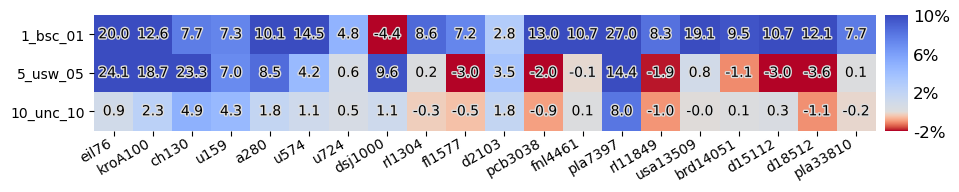

In [94]:
algo = 'CS2SA*'
algo_df4 = calc_algo_df(algo)

a = algo_df4.copy()
# a = a[a['type'] == 'unc']
a['type'] = a['type'].map({'bsc': 1, 'usw': 2, 'unc': 3})
a = a.sort_values(by=['cities', 'tsp', 'type', 'items', 'capacity'])

a = np.array(a['diff%'])
a = a.reshape((-1, 3)).T
a_clipped = a

if algo.startswith('COCO'):
    a_clipped = np.clip(a_clipped, -5, 5)
else:
    a_clipped = np.clip(a_clipped, -2, 10)

cmap = mpl.colormaps.get_cmap('coolwarm_r')
# cmap.set_bad(color='#273696')

# fig = plt.figure(figsize=(14, 16))
fig = plt.figure(figsize=(12, 1.5))
plt.imshow(a_clipped, cmap=cmap, interpolation='nearest', norm=TwoSlopeNorm(0), aspect='auto')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

algo_df_tsp_items = algo_df4[['tsp']].drop_duplicates()
algo_df_tsp_items = [f'{i}' for i in algo_df_tsp_items['tsp']]
ax.tick_params(axis='x', which='major', pad=0)
plt.xticks(range(len(algo_df_tsp_items)), algo_df_tsp_items, ha='right', rotation=30)

algo_df_type_cap = algo_df4[['items', 'type', 'capacity']].drop_duplicates()
algo_df_type_cap = [f'{it}_{t}_{i:02}' for (it, t, i) in zip(algo_df_type_cap['items'], algo_df_type_cap['type'], algo_df_type_cap['capacity'])]
plt.yticks(range(len(algo_df_type_cap)), algo_df_type_cap)

cb = plt.colorbar(pad=0.01, aspect=5)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both', length=0, labelsize=12)
cb.ax.set_yscale('linear')
cb.ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))

cb.set_ticks([-2, 2, 6, 10])
cb.set_ticklabels(['-2%', '2%', '6%', '10%'])

for (j,i),label in np.ndenumerate(a):
    plt.text(i,j, round(label, 1), ha='center', va='center', path_effects=[pe.withStroke(linewidth=2, foreground='#dddddd')])

# plt.savefig(f'/home/caios/figures/comp-{algo.lower()}.pdf', bbox_inches = "tight")
plt.savefig(f'/home/caios/figures/comp-cs2sastar.pdf', bbox_inches = "tight")
plt.show()

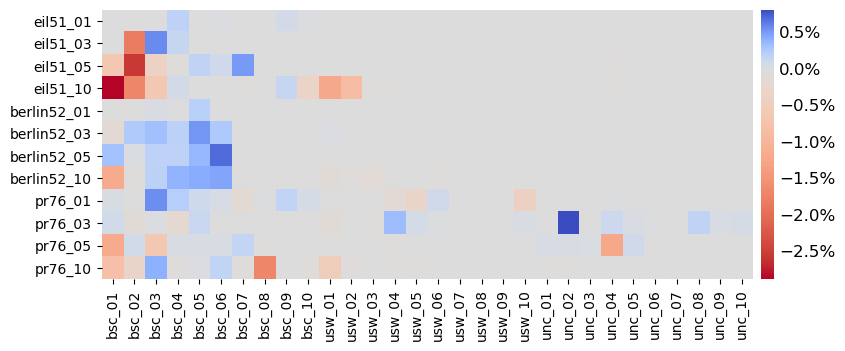

In [64]:
algo_df3 = calc_algo_df('MEA2P')
algo_df3 = algo_df3[((algo_df3['tsp'] == 'eil51') | (algo_df3['tsp'] == 'berlin52') | (algo_df3['tsp'] == 'pr76'))]

a = algo_df3.copy()
# a = a[a['type'] == 'unc']
a['type'] = a['type'].map({'bsc': 1, 'usw': 2, 'unc': 3})
a = a.sort_values(by=['cities', 'tsp', 'items', 'type', 'capacity'])

a = np.array(a['diff%'])
a = a.reshape((-1,120 // 4))
a_clipped = a
# a_clipped = np.clip(a_clipped, -2, 10)

cmap = mpl.colormaps.get_cmap('coolwarm_r')
# cmap.set_bad(color='#273696')

# fig = plt.figure(figsize=(14, 16))
fig = plt.figure(figsize=(10, 3.5))
plt.imshow(a_clipped, cmap=cmap, interpolation='nearest', norm=TwoSlopeNorm(0), aspect='auto')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

algo_df_tsp_items = algo_df3[['tsp', 'items']].drop_duplicates()
algo_df_tsp_items = [f'{t}_{i:02}' for (t, i) in zip(algo_df_tsp_items['tsp'], algo_df_tsp_items['items'])]
plt.yticks(range(len(algo_df_tsp_items)), algo_df_tsp_items)

algo_df_type_cap = algo_df3[['type', 'capacity']].drop_duplicates()
algo_df_type_cap = [f'{t}_{i:02}' for (t, i) in zip(algo_df_type_cap['type'], algo_df_type_cap['capacity'])]
# ax.tick_params(axis='x', which='major', pad=0)
plt.xticks(range(len(algo_df_type_cap)), algo_df_type_cap, rotation=90)

cb = plt.colorbar(pad=0.01, aspect=20)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both', length=0, labelsize=12)
cb.ax.set_yscale('linear')
cb.ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))

# for (j,i),label in np.ndenumerate(a):
#     plt.text(i,j, round(label, 1), ha='center', va='center', path_effects=[pe.withStroke(linewidth=2, foreground='#dddddd')])

plt.savefig('/home/caios/figures/comp-mea2p-small.pdf', bbox_inches = "tight")
plt.show()

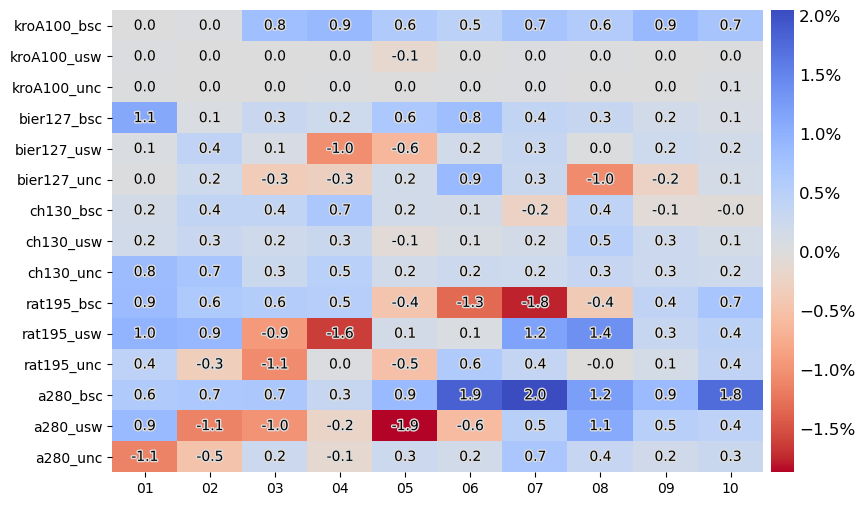

In [51]:
algo_df3 = calc_algo_df('MEA2P')
algo_df3 = algo_df3[~((algo_df3['tsp'] == 'eil51') | (algo_df3['tsp'] == 'berlin52') | (algo_df3['tsp'] == 'pr76'))]

a = algo_df3.copy()
# a = a[a['type'] == 'unc']
a['type'] = a['type'].map({'bsc': 1, 'usw': 2, 'unc': 3})
a = a.sort_values(by=['cities', 'tsp', 'type', 'items', 'capacity'])

a = np.array(a['diff%'])
a = a.reshape((-1,120 // 4 // 3))
a_clipped = a
# a_clipped = np.clip(a_clipped, -2, 10)

cmap = mpl.colormaps.get_cmap('coolwarm_r')
# cmap.set_bad(color='#273696')

# fig = plt.figure(figsize=(14, 16))
fig = plt.figure(figsize=(10, 6))
plt.imshow(a_clipped, cmap=cmap, interpolation='nearest', norm=TwoSlopeNorm(0), aspect='auto')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

algo_df_tsp_items = algo_df3[['tsp', 'type']].drop_duplicates()
algo_df_tsp_items = [f'{t}_{i}' for (t, i) in zip(algo_df_tsp_items['tsp'], algo_df_tsp_items['type'])]
plt.yticks(range(len(algo_df_tsp_items)), algo_df_tsp_items)

algo_df_type_cap = algo_df3[['capacity']].drop_duplicates()
algo_df_type_cap = [f'{i:02}' for (t, i) in zip(algo_df_type_cap['capacity'], algo_df_type_cap['capacity'])]
# ax.tick_params(axis='x', which='major', pad=0)
plt.xticks(range(len(algo_df_type_cap)), algo_df_type_cap, rotation=0)

cb = plt.colorbar(pad=0.01, aspect=20)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both', length=0, labelsize=12)
cb.ax.set_yscale('linear')
cb.ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))

for (j,i),label in np.ndenumerate(a):
    plt.text(i,j, round(label, 1), ha='center', va='center', path_effects=[pe.withStroke(linewidth=2, foreground='#dddddd')])

plt.savefig('/home/caios/figures/comp-mea2p-big.pdf', bbox_inches = "tight")
plt.show()

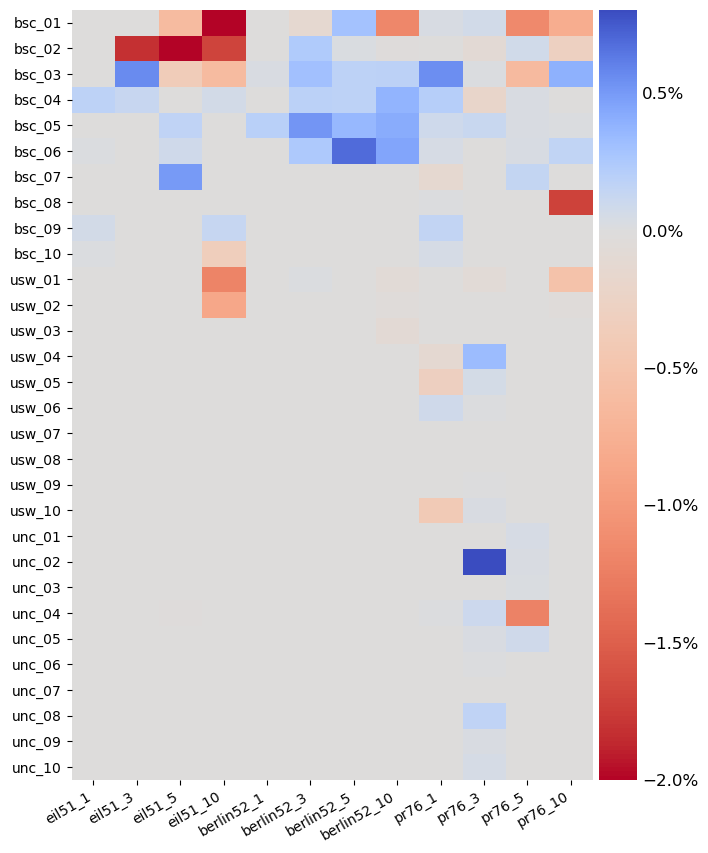

In [34]:
algo_df3 = calc_algo_df('MEA2P')
algo_df3 = algo_df3[((algo_df3['tsp'] == 'eil51') | (algo_df3['tsp'] == 'berlin52') | (algo_df3['tsp'] == 'pr76'))]

a = algo_df3.copy()
# a = a[a['type'] == 'unc']
a['type'] = a['type'].map({'bsc': 1, 'usw': 2, 'unc': 3})
a = a.sort_values(by=['cities', 'tsp', 'items', 'type', 'capacity'])

a = np.array(a['diff%'])
a = a.reshape((-1,120 // 4))
a_clipped = a.T
a_clipped = np.clip(a_clipped, -2, 10)

cmap = mpl.colormaps.get_cmap('coolwarm_r')
# cmap.set_bad(color='#273696')

fig = plt.figure(figsize=(8, 10))
plt.imshow(a_clipped, cmap=cmap, interpolation='nearest', norm=TwoSlopeNorm(0), aspect='auto')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

algo_df_tsp_items = algo_df3[['tsp', 'items']].drop_duplicates()
algo_df_tsp_items = [f'{t}_{i}' for (t, i) in zip(algo_df_tsp_items['tsp'], algo_df_tsp_items['items'])]
plt.xticks(range(len(algo_df_tsp_items)), algo_df_tsp_items, rotation=30, ha='right')

algo_df_type_cap = algo_df3[['type', 'capacity']].drop_duplicates()
algo_df_type_cap = [f'{t}_{i:02}' for (t, i) in zip(algo_df_type_cap['type'], algo_df_type_cap['capacity'])]
# ax.tick_params(axis='x', which='major', pad=0)
plt.yticks(range(len(algo_df_type_cap)), algo_df_type_cap, rotation=0)

cb = plt.colorbar(pad=0.01, aspect=20)
cb.outline.set_visible(False)
cb.ax.tick_params(axis='both', which='both', length=0, labelsize=12)
cb.ax.set_yscale('linear')
cb.ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))

# for (j,i),label in np.ndenumerate(a):
#     plt.text(i,j, round(label, 1), ha='center', va='center', path_effects=[pe.withStroke(linewidth=2, foreground='#dddddd')])

# plt.savefig('/home/caios/figures/comp-mea2p-small.pdf', bbox_inches = "tight")
plt.show()